<a href="https://colab.research.google.com/github/tul17ii/KNN-in-ML/blob/main/bibrate_and_unibubrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supervised_learning_table17_1.csv to supervised_learning_table17_1.csv


Step 1: Loaded Data from CSV (All Rows)
  Step  X1  X2  Z  W1_init  W2_init  Y  Delta  W1_final  W2_final
    1   0   0  0      0.1      0.3  0    0.0       0.1       0.3
    1   0   1  1      0.1      0.3  0    1.0       0.1       0.5
    1   1   0  1      0.1      0.5  0    1.0       0.3       0.5
    1   1   1  1      0.3      0.5  1    0.0       0.3       0.5
    2   0   0  0      0.3      0.5  0    0.0       0.3       0.5
    2   0   1  1      0.3      0.5  0    1.0       0.3       0.7
    2   1   0  1      0.3      0.7  0    1.0       0.5       0.7
    2   1   1  1      0.5      0.7  1    0.0       0.5       0.7
    3   0   0  0      0.5      0.7  0    0.0       0.5       0.7
    3   0   1  1      0.5      0.7  0    0.0       0.5       0.7
    3   1   0  1      0.5      0.7  0    1.0       0.7       0.7
    3   1   1  1      0.7      0.7  1    0.0       0.7       0.7
    4   0   0  0      0.7      0.7  0    0.0       0.7       0.7
    4   0   1  1      0.7      0.7  0    0.0     

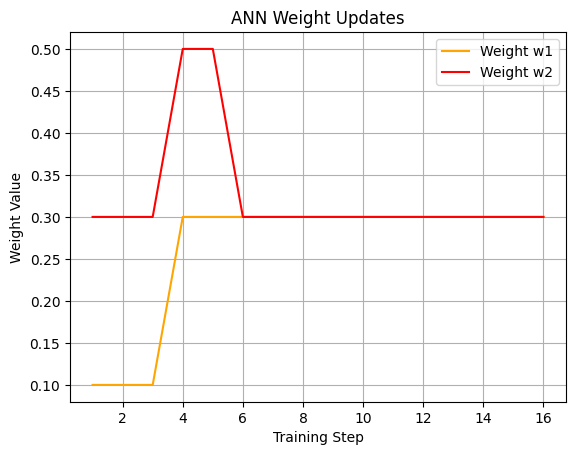


Final Result Table:

 Step  Predicted Y  Actual Y  Final w1  Final w2
    1            0         0       0.1       0.3
    2            0         0       0.1       0.3
    3            0         0       0.1       0.3
    4            0         1       0.3       0.5
    5            0         0       0.3       0.5
    6            1         0       0.3       0.3
    7            0         0       0.3       0.3
    8            1         1       0.3       0.3
    9            0         0       0.3       0.3
   10            0         0       0.3       0.3
   11            0         0       0.3       0.3
   12            1         1       0.3       0.3
   13            0         0       0.3       0.3
   14            0         0       0.3       0.3
   15            0         0       0.3       0.3
   16            1         1       0.3       0.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore

# Step 1: Load CSV Data
df = pd.read_csv("supervised_learning_table17_1.csv")
print("Step 1: Loaded Data from CSV (All Rows)\n", df.to_string(index=False))

# Step 2a: Handling Missing Values (Univariate)
print("\nStep 2a: Handling Missing Values (Univariate)")
missing_before = df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
missing_after = df.isnull().sum()
print("Missing values before:\n", missing_before)
print("Missing values after:\n", missing_after)

# Step 2a: Handling Missing Values (Bivariate)
print("\nStep 2a: Bivariate Missing Value Check (Simulated)")
group_missing = df[df['Z'].isnull()].groupby(['X1', 'X2']).size().unstack(fill_value=0)
print("Conditional missing count of 'Z':")
print(group_missing)

# Step 2b: Outlier Detection and Handling (Univariate Z-Score)
print("\nStep 2b: Outlier Detection with Z-score (Univariate)")
columns_to_check = ['X1', 'X2', 'Z']
z_scores_np = np.abs(zscore(df[columns_to_check]))

for i, col in enumerate(columns_to_check):
    outliers = z_scores_np[:, i] > 3
    if outliers.any():
        print(f"Outliers detected in {col} at rows: {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No significant outliers found in {col}.")

# Step 2c: Scaling, Normalization, and Transformation
print("\nStep 2c: StandardScaler, MinMaxScaler, PowerTransformer\n")

# StandardScaler
scaler = StandardScaler()
std_scaled = scaler.fit_transform(df[columns_to_check])
df[['X1_std', 'X2_std', 'Z_std']] = std_scaled

# MinMaxScaler
minmax = MinMaxScaler()
mm_scaled = minmax.fit_transform(df[columns_to_check])
df[['X1_mm', 'X2_mm', 'Z_mm']] = mm_scaled

# PowerTransformer
pt = PowerTransformer()
pt_scaled = pt.fit_transform(df[columns_to_check])
df[['X1_pt', 'X2_pt', 'Z_pt']] = pt_scaled

print(df[['X1', 'X2', 'Z',
          'X1_std', 'X2_std', 'Z_std',
          'X1_mm', 'X2_mm', 'Z_mm',
          'X1_pt', 'X2_pt', 'Z_pt']].to_string(index=False))

# Step 3: Correlation Matrix (Bivariate Analysis)
print("\nStep 3: Bivariate Correlation Matrix")
correlation = df[columns_to_check].corr()
print(correlation)

# Step 4: ANN Logic (Step-by-Step Perceptron)
print("\nStep 4: ANN Step-by-Step Updates\n")
alpha = 0.2
threshold = 0.5
w1, w2 = 0.1, 0.3

steps, outputs, weights_w1, weights_w2 = [], [], [], []

for i in range(len(df)):
    x1 = df.loc[i, 'X1']
    x2 = df.loc[i, 'X2']
    y = df.loc[i, 'Y']

    net = x1 * w1 + x2 * w2
    y_pred = 1 if net >= threshold else 0
    error = y - y_pred

    print(f"Step {i+1}: x1={x1}, x2={x2}, y={y}, net={net:.2f}, pred={y_pred}, error={error}")
    print(f"  Before update: w1={w1:.2f}, w2={w2:.2f}")

    w1 = w1 + alpha * error * x1
    w2 = w2 + alpha * error * x2

    print(f"  After update:  w1={w1:.2f}, w2={w2:.2f}\n")

    steps.append(i + 1)
    outputs.append(y_pred)
    weights_w1.append(round(w1, 2))
    weights_w2.append(round(w2, 2))

# Step 5: Plot weight updates
plt.plot(steps, weights_w1, label='Weight w1', color='orange')
plt.plot(steps, weights_w2, label='Weight w2', color='red')
plt.xlabel("Training Step")
plt.ylabel("Weight Value")
plt.title("ANN Weight Updates")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Final Result Table
result_df = pd.DataFrame({
    "Step": steps,
    "Predicted Y": outputs,
    "Actual Y": df['Y'],
    "Final w1": weights_w1,
    "Final w2": weights_w2
})

print("\nFinal Result Table:\n")
print(result_df.to_string(index=False))

ANN


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving knn_example_dataset.csv to knn_example_dataset.csv


In [ ]:
# STEP 0: Upload and import libraries
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from scipy.stats import zscore

# STEP 1: Load dataset
filename = next(iter(uploaded))
df = pd.read_csv(filename)
print("Original Data:\n", df.to_string(index=False))

# STEP 2a: Handle Missing Values
print("\nStep 2a: Handling Missing Values (Univariate)")
print("Before:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
print("After:\n", df.isnull().sum())

# Simulated bivariate missing analysis (based on 'Category (Y)')
if 'Category (Y)' in df.columns:
    print("\nSimulated Bivariate Missing Check on 'Category (Y)'")
    group_missing = df[df['Category (Y)'].isnull()].groupby(['X1 (Durability)', 'X2 (Strength)']).size().unstack(fill_value=0)
    print(group_missing)

# STEP 2b: Outlier detection using Z-score
print("\nStep 2b: Outlier Detection and Handling (Z-score)")
num_cols = ['X1 (Durability)', 'X2 (Strength)']
z_scores = np.abs(zscore(df[num_cols]))
for i, col in enumerate(num_cols):
    outliers = z_scores[:, i] > 3
    if outliers.any():
        print(f"Outliers in {col}: Rows {np.where(outliers)[0].tolist()}")
        df.loc[outliers, col] = df[col].median()
    else:
        print(f"No outliers in {col}")

# STEP 2c: Scaling & Transformation
print("\nStep 2c: Feature Scaling and Transformation")

# StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df[num_cols])
df[['X1_std', 'X2_std']] = df_std

# MinMaxScaler (Optional, not used for KNN here)
minmax = MinMaxScaler()
df_mm = minmax.fit_transform(df[num_cols])
df[['X1_mm', 'X2_mm']] = df_mm

# PowerTransformer (Optional, not used for KNN here)
pt = PowerTransformer()
df_pt = pt.fit_transform(df[num_cols])
df[['X1_pt', 'X2_pt']] = df_pt

print(df[['X1 (Durability)', 'X2 (Strength)', 'X1_std', 'X2_std']])

# STEP 3: KNN Classification (on standardized data)
X = df[['X1_std', 'X2_std']].values
y = df['Category (Y)'].values

# Test point (3,7) needs to be standardized using same scaler
new_point_raw = np.array([[3, 7]])
new_point_scaled = scaler.transform(new_point_raw)[0]

k = 3
print(f"\nKNN Classification for (3,7) with k={k}")

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

distances = []
for i in range(len(X)):
    dist = euclidean_distance(new_point_scaled, X[i])
    distances.append((dist, y[i]))
    print(f"Distance to point {X[i]} ({y[i]}): {dist:.2f}")

# Nearest neighbors
distances.sort()
neighbors = distances[:k]
print(f"\nTop {k} Neighbors:")
for i, (dist, label) in enumerate(neighbors, 1):
    print(f"{i}. Distance: {dist:.2f}, Label: {label}")

# Majority vote
votes = [label for (_, label) in neighbors]
prediction = Counter(votes).most_common(1)[0][0]
print("\nVotes:", votes)
print(f"Final Prediction: '{prediction}'")

# STEP 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y=='Good', 0], X[y=='Good', 1], color='green', label='Good')
plt.scatter(X[y=='Bad', 0], X[y=='Bad', 1], color='red', label='Bad')
plt.scatter(new_point_scaled[0], new_point_scaled[1], color='blue', marker='*', s=300, label='New Point (3,7)')

# Optional: draw dotted lines
for x in X:
    plt.plot([x[0], new_point_scaled[0]], [x[1], new_point_scaled[1]], 'gray', linestyle=':', alpha=0.4)

plt.title('KNN Classification with Preprocessing')
plt.xlabel('X1_std')
plt.ylabel('X2_std')
plt.legend()
plt.grid(True)
plt.show()